<a href="https://colab.research.google.com/github/olliemamuda/Individual_Short_Project/blob/main/ISP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# GA applied to Simple Neural Network

# Data Pre-processing

First we set a random seed for repeatability and import all modules

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
import ast
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

randomSeed = 0
np.random.seed(randomSeed)
random.seed(randomSeed)

## Processing the Iris dataset

In [ ]:
# open the dataset
dataset = "iris"
df = pd.read_csv("drive/MyDrive/ISP_datasets/iris/iris.data", names=["sepal_length",
                                             "sepal_width",
                                             "petal_length",
                                             "petal_width",
                                             "class"])

# map classes to 1 for Iris Setosa, 0 otherwise
oneHotEncode = False
df["class"] = list(map(lambda x: 1 if(x == "Iris-versicolor") else 0, df["class"]))

# get X and y from df
y = df.pop("class").to_numpy()
X = df.to_numpy()
numClasses = len(np.unique(y))

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3)

## Processing the MNIST Dataset

In [ ]:
oneHotEncode = True
sideLength = 8

# load the dataset and split
dataset = "mnist"
X, y = load_digits(return_X_y=True)
X = np.array(X)
y = np.array(y)
numClasses = len(np.unique(y))

# One Hot Encode y
if(oneHotEncode):
    y = y.reshape(-1, 1)
    y = OneHotEncoder().fit_transform(y).toarray()
else:
    y = np.array(list(map(lambda el: 1 if(el == 0) else 0, y)))

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.1, random_state=randomSeed)

## Processing the Fashion MNIST Dataset

In [ ]:
# If using TensorFlow, set oneHotEncode to False! (it does it itself)
oneHotEncode = False  # True
sideLength = 28

# open the datasets
dataset = "fashionMnist"
df_test = pd.read_csv("drive/MyDrive/ISP_datasets/fashionMNIST/fashion-mnist_test.csv")
df_tr = pd.read_csv("drive/MyDrive/ISP_datasets/fashionMNIST/fashion-mnist_train.csv")

# Make X_tr, ..., y_test
y_tr = df_tr.pop("label").to_numpy()
X_tr = df_tr.to_numpy()
y_test = df_test.pop("label").to_numpy()
X_test = df_test.to_numpy()
numClasses = len(np.unique(y_tr, axis=0))

# One-Hot-Encode
if(oneHotEncode):
    y_tr = y_tr.reshape(-1, 1)
    y_tr = OneHotEncoder().fit_transform(y_tr).toarray()

    y_test = y_test.reshape(-1, 1)
    y_test = OneHotEncoder().fit_transform(y_test).toarray()

# Model Training

## For Dataset

### Train logistic regression model

Only use for Iris, or MNIST with 1d labels (no one hot encoding)

In [ ]:
if(oneHotEncode):
    print("error, one hot encoding.")

# liblinear recommended from sklearn documentation
lrModel = LogisticRegression(solver="lbfgs", random_state=randomSeed) # penaulty = None
lrModel.fit(X_tr, y_tr)

#evaluation
print("Logistic Regression Score on training data: "+str(lrModel.score(X_tr, y_tr)))
print("Logistic Regression Score on test data: "+str(lrModel.score(X_test, y_test)))

Logistic Regression Score on training data: 0.7523809523809524
Logistic Regression Score on test data: 0.6444444444444445


### Simple MLP

In [ ]:
if(dataset == "fashionMnist"):
    hidden_layer_sizes = (128,)
    batch_size = 1000
else:
    hidden_layer_sizes = (50,)
    batch_size = "auto"

nnModel = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                        batch_size=batch_size,
                        random_state=randomSeed)
nnModel.fit(X_tr, y_tr)

print("NN accuracy on training set: "+str(nnModel.score(X_tr, y_tr)))
print("NN accuracy on test set: "+str(nnModel.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


NN accuracy on training set: 0.9149833333333334
NN accuracy on test set: 0.8422


### TF Neural Network

In [ ]:
# Create model and define loss
tfNNModel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10)
])
lossFunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile and fit
tfNNModel.compile(optimizer='adam',
                loss=lossFunc,
                metrics=['accuracy'])
tfNNModel.fit(X_tr.reshape(len(X_tr), 28, 28), y_tr, batch_size=200, epochs=5)

# Evaluate
print("NN metrics on training set:")
print(tfNNModel.evaluate(X_tr.reshape(len(X_tr), 28, 28),  y_tr, verbose=2))
print()

print("NN metrics on test set:")
print(tfNNModel.evaluate(X_test.reshape(len(X_test), 28, 28),  y_test, verbose=2))

Epoch 1/5
300/300 [==============================] - 7s 20ms/step - loss: 5.7718 - accuracy: 0.7590
Epoch 2/5
300/300 [==============================] - 6s 19ms/step - loss: 0.9191 - accuracy: 0.8160
Epoch 3/5
300/300 [==============================] - 5s 15ms/step - loss: 0.5583 - accuracy: 0.8437
Epoch 4/5
300/300 [==============================] - 6s 18ms/step - loss: 0.4460 - accuracy: 0.8580
Epoch 5/5
300/300 [==============================] - 5s 16ms/step - loss: 0.3848 - accuracy: 0.8702
NN metrics on training set:
1875/1875 - 4s - loss: 0.3425 - accuracy: 0.8775 - 4s/epoch - 2ms/step
[0.34251245856285095, 0.8774999976158142]

NN metrics on test set:
313/313 - 1s - loss: 0.4560 - accuracy: 0.8570 - 1s/epoch - 4ms/step
[0.4559515118598938, 0.8569999933242798]


In [ ]:
# Make logits a probability distribution
tfNNProbModel = tf.keras.Sequential([
    tfNNModel,
    tf.keras.layers.Softmax()
])

# making logits normalised (no softmax)
#def tfNNProbModel(x):
#    arr = np.array(tfNNModel(x)[0])
#    newArr = (arr - np.min(arr)) / (max(arr) - min(arr))
#    return [newArr]

## For Noise Classification

### Noise vs Data Processing

In [ ]:
if(dataset == "fashionMnist"):
    maxPixel = 255 # 17
else:
    maxPixel = 17

# Create dataset from noise and data
noise_tr = np.random.randint(0, maxPixel, (X_tr.shape[0], X_tr.shape[1]))
X_noisy_tr = np.concatenate((noise_tr, X_tr))
y_noisy_tr = np.concatenate(([0 for _ in range(0, X_tr.shape[0])], [1 for _ in range(0, X_tr.shape[0])]), axis=0)

noise_test = np.random.randint(0, maxPixel, (X_test.shape[0], X_tr.shape[1]))
X_noisy_test = np.concatenate((noise_test, X_test))
y_noisy_test = np.concatenate(([0 for _ in range(0, X_test.shape[0])], [1 for _ in range(0, X_test.shape[0])]), axis=0)

# Shuffle
shuffleIndices_tr = np.arange(X_noisy_tr.shape[0])
np.random.shuffle(shuffleIndices_tr)
X_noisy_tr = X_noisy_tr[shuffleIndices_tr]
y_noisy_tr = y_noisy_tr[shuffleIndices_tr]

shuffleIndices_test = np.arange(X_noisy_test.shape[0])
np.random.shuffle(shuffleIndices_test)
X_noisy_test = X_noisy_test[shuffleIndices_test]
y_noisy_test = y_noisy_test[shuffleIndices_test]

### Noise vs Data NN Model (sklearn classification)

In [ ]:
if(dataset == "fashionMnist"):
    batch_size = "auto" # 1000
else:
    batch_size = "auto"

# Train
isDataModelnn = MLPClassifier(hidden_layer_sizes = (50,), random_state=randomSeed, batch_size=batch_size)
isDataModelnn.fit(X_noisy_tr, y_noisy_tr)

print("NN accuracy on training set: "+str(isDataModelnn.score(X_noisy_tr[:1000], y_noisy_tr[:1000])))
print("NN accuracy on test set: "+str(isDataModelnn.score(X_noisy_test[:1000], y_noisy_test[:1000])))

NN accuracy on training set: 1.0
NN accuracy on test set: 1.0


### Noise vs LR Model

In [ ]:
# Train
isDataModellr = LogisticRegression(random_state=randomSeed)
isDataModellr.fit(X_noisy_tr, y_noisy_tr)

print("NN accuracy on training set: "+str(isDataModellr.score(X_noisy_tr, y_noisy_tr)))
print("NN accuracy on test set: "+str(isDataModellr.score(X_noisy_test, y_noisy_test)))

## For Noise Regression

### Noise to Data Preprocessing

In [ ]:
if(dataset == "fashionMnist"):
    maxPixel = 255 # 17
else:
    maxPixel = 17

X_noisy = []
y_noisy = []
for i in range(0, len(X_tr)):
    # get ndr and noise
    noiseToDataRatio = np.random.rand() # 0 = noise, 1 = data
    noise = np.random.randint(0, maxPixel, (X_tr.shape[1]))
    data = X_tr[i]

    # combine and store
    dp = (noise * (1 - noiseToDataRatio)) + (data * noiseToDataRatio)
    X_noisy.append(dp)
    y_noisy.append(noiseToDataRatio)

X_noisy = np.array(X_noisy)
y_noisy = np.array(y_noisy)
X_noisy_tr, X_noisy_test, y_noisy_tr, y_noisy_test = train_test_split(X_noisy, y_noisy, test_size=0.1)

### Noisy to Data NN Model (sklearn regression)

In [ ]:
if(dataset == "fashionMnist"):
    batch_size = "auto" # 1000
else:
    batch_size = "auto"

# Train
isDataModelNNreg = MLPRegressor(hidden_layer_sizes = (300, 100), random_state=randomSeed, batch_size=batch_size)
isDataModelNNreg.fit(X_noisy_tr, y_noisy_tr)

print("NN accuracy on training set: "+str(isDataModelNNreg.score(X_noisy_tr[:1000], y_noisy_tr[:1000])))
print("NN accuracy on test set: "+str(isDataModelNNreg.score(X_noisy_test[:1000], y_noisy_test[:1000])))

### Noise to Data NN Model (TensorFlow regression)

In [ ]:
# Create model and define loss
tfIsDataModelnn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile and fit
tfIsDataModelnn.compile(optimizer='adam',
                        loss='mean_absolute_error',
                        metrics=[tf.keras.metrics.R2Score()])
tfIsDataModelnn.fit(X_noisy_tr.reshape(-1, 28, 28), y_noisy_tr, epochs=5)

# Evaluate
print("NN metrics on training set:")
print(tfIsDataModelnn.evaluate(X_noisy_tr.reshape(-1, 28, 28),  y_noisy_tr, verbose=2))
print()

print("NN metrics on test set:")
print(tfIsDataModelnn.evaluate(X_noisy_test.reshape(-1, 28, 28),  y_noisy_test, verbose=2))

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 2.2646 - r2_score: -5682.0552
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1683 - r2_score: -0.0568
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1608 - r2_score: 0.3853
Epoch 4/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1605 - r2_score: 0.3871
Epoch 5/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1592 - r2_score: 0.4454
NN metrics on training set:
1688/1688 - 3s - loss: 0.1390 - r2_score: 0.6502 - 3s/epoch - 2ms/step
[0.1389869898557663, 0.6501695513725281]

NN metrics on test set:
188/188 - 0s - loss: 0.1462 - r2_score: 0.2176 - 379ms/epoch - 2ms/step
[0.14615117013454437, 0.2175644040107727]


## For Autoencoder

### TF Autoencoder

In [ ]:
latentSpaceSize = 64

def getDataForEncoder(targetClass):
    # dont think this will happen, cba to code it
    if(oneHotEncode):
        print("Autoencoder error, you're one hot encoded")

    # Training
    new_X_tr = []
    for i, y_point in enumerate(y_tr):
        if(y_point == targetClass):
            new_X_tr.append(X_tr[i])

    # Testing
    new_X_test = []
    for i, y_point in enumerate(y_test):
        if(y_point == targetClass):
            new_X_test.append(X_test[i])

    return np.array(new_X_tr), np.array(new_X_test)

def makeAutoencoder(new_X_tr, new_X_test):
    tfEncoder = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784,)),
        tf.keras.layers.Dense(350, activation='sigmoid'),
        tf.keras.layers.Dense(latentSpaceSize, activation='sigmoid')
    ])

    tfDecoder = tf.keras.models.Sequential([
        tf.keras.layers.Dense(350, activation='sigmoid'),
        tf.keras.layers.Dense(784, activation='sigmoid'),
        tf.keras.layers.Reshape((784,))
    ])

    tfAutoencoder = tf.keras.Sequential([
        tfEncoder,
        tfDecoder
    ])

    tfAutoencoder.compile(optimizer='adam',
                          loss=tf.keras.losses.MeanSquaredError())
    tfAutoencoder.fit(new_X_tr, new_X_tr,
                      epochs=10,
                      shuffle=True)
                      #validation_data=(new_X_test, new_X_test))

    return tfAutoencoder, tfEncoder, tfDecoder

In [ ]:
new_X_tr, new_X_test = getDataForEncoder(8)
tfAutoencoder, tfEncoder, tfDecoder = makeAutoencoder(new_X_tr / 255, new_X_test / 255)

Epoch 1/10
188/188 [==============================] - 3s 11ms/step - loss: 0.0689
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0415
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0359
Epoch 4/10
188/188 [==============================] - 3s 15ms/step - loss: 0.0318
Epoch 5/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0300
Epoch 6/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0289
Epoch 7/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0280
Epoch 8/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0272
Epoch 9/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0266
Epoch 10/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0261


1.02


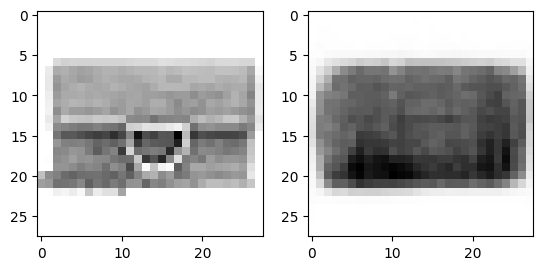

In [ ]:
a = new_X_tr[10] / 255
b = tfEncoder(a.reshape(1, 784))
c = tfDecoder(b)

print(np.max(a))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(a.reshape((sideLength, sideLength)), cmap='Greys', interpolation='nearest')
ax2.imshow(np.array(c).reshape((sideLength, sideLength)), cmap='Greys', interpolation='nearest')
plt.show()

# The Genetic Algorithm

### Helper Functions and Hyperparamaters

Defines hyperparamaters, allele boundaries and initalization function for population

In [ ]:
# Hyperparamaters
N = 100
maxGenerations = 500
numParents = 30
tournamentSizes = 3
mutationRate = 0.01
doingFitnessCuttoff = True
fitnessCuttoff = 1.0
l = 0.0005    # Extent to which we penalise closeness to mean hyperparameter (only if using fitnessRegulaised)
l2 = 0.001      # Extent to which we penalise being noisy hyperparameter (only if using fitnessDenoised)
l3 =  50    # Only for FitnessSharing
alpha = 1    # Only for FitnessSharing
model = tfNNProbModel
modelType = "tf nn"     # from ["sklearn nn", "tf nn", "sklearn lr"]
isDataModel = isDataModelnn
isDataModelType = "nn classification"       # from ["nn regression", "nn classification", "lr", "tf nn regression"]
usingAutoenc = False





# Define dimensions of individual
if(usingAutoenc):
    individualDim = latentSpaceSize
else:
    individualDim = X_tr.shape[1]

# Define boundaries of an individual
if(usingAutoenc):
    mins = np.repeat(0, individualDim)
    maxs = np.repeat(1, individualDim)
else:
    mins = np.min(X_tr, axis=0)
    maxs = np.max(X_tr, axis=0)

#Define average individual in target class
if(not usingAutoenc):
    ave = np.zeros(numClasses * X_tr.shape[1]).reshape(numClasses, X_tr.shape[1])

    count = np.zeros(numClasses)
    for i, dp in enumerate(X_tr):
        if(oneHotEncode):
            # Get label
            j = np.where(y_tr[i] == 1)[0][0]

            ave[j] += dp
            count[j] += 1
        else:
            ave[y_tr[i]] += dp
            count[y_tr[i]] += 1
        #elif(y_tr[i] == 1):
        #    ave += dp

        #count += 1
    for i in range(0, numClasses):
        ave[i] /= count[i]

# Allows the fitness functions to use the ML models
def predict(individual, targetClass):
    # Make sure we're using image representation
    if(usingAutoenc):
        decodedImage = tfDecoder(individual.reshape(1, -1))
        imageRep = np.array(decodedImage) * 255
    else:
        imageRep = individual

    # Do prediction
    if(modelType == "sklearn nn"):
        if(targetClass == -1):
            return model.predict_proba(imageRep.reshape(1, -1))[0][1]
        else:
            return model.predict_proba(imageRep.reshape(1, -1))[0][targetClass]
    elif(modelType == "tf nn"):
        return float(model(imageRep.reshape(1, sideLength, sideLength))[0][targetClass])

# returns penalty for being noisy
def getDenoisedPen(individual):
    if(isDataModelType == "nn regression" or isDataModelType == "tf nn regression"):
        # Get 'dataness' and bound between 0 and 1
        if(isDataModelType == "nn regression"):
            dataness = isDataModel.predict(individual.reshape(1, -1))[0]
        elif(isDataModelType == "tf nn regression"):
            dataness = float(isDataModel(individual.reshape(-1, 28, 28))[0][0])

        if(dataness > 1):
            dataness = 1
        elif(dataness < 0):
            dataness = 0

        # Calulate and return pen
        pen = (-1 * dataness) + 1
        return pen
    elif(isDataModelType == "nn classification" or isDataModelType == "lr"):
        return isDataModel.predict_proba(individual.reshape(1, -1))[0][0]

# Starts with uniform random alleles in the correct range
def init_population(N, targetClass):
    population = np.zeros((N, individualDim))

    for i in range(0, N):
        # create random individual
        individual = np.zeros(individualDim)
        for j in range(0, len(individual)):
            individual[j] = random.uniform(mins[j], maxs[j])

        # Add them to population
        population[i] = individual

    return population



Define fitness and parent selection function

In [ ]:
# fitness = probability individual is classified as target class
def fitness(targetClass, individual, population):
    return predict(individual, targetClass)

# Uses 'l' to discourage being far from the average
def fitnessRegularised(targetClass, individual, population):
    return fitness(targetClass, individual, population) - l*np.linalg.norm(individual - ave[targetClass])

# Uses 'l2' to discourage being classified as random
def fitnessDenoised(targetClass, individual, population):
    pen = getDenoisedPen(individual)
    return fitness(targetClass, individual, population) - l2*pen

# Fitness Sharing using l3 and alpha
def fitnessSharing(targetClass, individual, population):
    f = fitnessDenoised(targetClass, individual, population)
    totalSharingFunc = 0

    # Calculate penalty, it should be aprox. = the number of individuals in radius
    for ind in population:
        dist = np.linalg.norm(individual - ind)
        if(dist < l3):
            # For every individual in the radius, there is a penalty between 0 and 1 (depending on distance)
            totalSharingFunc += 1 - np.power(dist / l3, alpha)

    return f / totalSharingFunc

# tournament selection, winner is max fitness
def select(population, fitnesses):
    parents = np.zeros((numParents, population.shape[1]))
    for i in range(len(parents)):
        tournamentIndices = np.random.choice(range(0, N), size=tournamentSizes, replace=False)
        tournamentFitnesses = np.take(fitnesses, tournamentIndices)
        winnerIndicesIndex = np.argmax(tournamentFitnesses)
        winnerIndex = tournamentIndices[winnerIndicesIndex]
        winner = population[winnerIndex]

        parents[i] = winner

    return parents

# Helper for selectRoulette, chooses only one parent w.p proportional to fitness
def selectOneRoulette(population, fitnesses):
    s = np.sum(fitnesses)
    p = np.random.rand() * s
    total = 0
    for i in range(0, N):
        total += fitnesses[i]
        if(total > p):
            return population[i]
    return -1

# Selects numParent parents
def selectRoulette(population, fitnesses):
    parents = np.zeros((numParents, population.shape[1]))
    for i in range(0, numParents):
        parents[i] = selectOneRoulette(population, fitnesses)

    return parents

Defines mutation and breeding function

In [ ]:
# if chosen, allele goes uniform random in correct range
def mutate(individual):
    for i in range(0, len(individual)):
        if(np.random.rand() <= mutationRate):
            individual[i] = np.random.uniform(mins[i], maxs[i])
    return individual

# one point crossover
def breed(parents):
    offspring = np.zeros((N, parents.shape[1]))
    for i in range(0, N):
        currentParents = np.random.default_rng().choice(parents, size=2, replace=False)
        crossoverPoint = np.random.randint(0, parents.shape[1]) # This index will take the 2nd parents allele

        childLeft = np.take(currentParents[0], range(0, crossoverPoint))
        childRight = np.take(currentParents[1], range(crossoverPoint, parents.shape[1]))

        child = np.concatenate((childLeft, childRight), axis=None)
        offspring[i] = mutate(child)

    return offspring

In [ ]:
# For printing
def showImage(ind, save=""):
    if(usingAutoenc):
        decodedIm = np.array(tfDecoder(ind.reshape(1, 64))).reshape((sideLength, sideLength))
        plt.imshow(decodedIm, cmap='Greys', interpolation='nearest')
    else:
        plt.imshow(ind.reshape((sideLength, sideLength)), cmap='Greys', interpolation='nearest')

    plt.tight_layout()
    plt.axis("off")

    if(save == ""):
        plt.show()
    else:
        plt.savefig(save)



### The Genetic Search

In [ ]:
# Target class is the class we are optimizing our inputs to fit
# targetClass = -1 indicates y is 1D and a target class has already been chosen
def runGA(targetClass=-1, logging=False, printing=True):
    # For Plots
    genLog = []
    fitnessLog = []
    distLog = []
    noiseLog = []

    # Returns best individual
    bestInd = []
    bestFitness = -1

    population = init_population(N, targetClass)
    for gen in range(0, maxGenerations):
        # evalute fitness
        fitnesses = list(map(lambda ind: fitnessDenoised(targetClass, ind, population), population))

        # Find best individual
        maxFitness = np.max(fitnesses)
        bestInd = population[np.argmax(fitnesses)]

        # check if we're done
        if(doingFitnessCuttoff and maxFitness >= fitnessCuttoff):
            if(printing):
                print("generation: "+str(gen)+
                      ", max fitness: "+str(maxFitness))
                if(dataset == "mnist" or dataset == "fashionMnist"):
                    showImage(bestInd)
                elif(dataset == "iris"):
                    print(bestInd)
            break

        # logging for plots
        if(logging):
            genLog.append(gen)
            fitnessLog.append(maxFitness)
            distLog.append(np.linalg.norm(bestInd - ave[targetClass]))
            if(not dataset == "iris"):
                noiseLog.append(getDenoisedPen(bestInd))

        # Printing
        if(printing and gen % 10 == 0):
            print("generation: "+str(gen)+
                  ", max fitness: "+str(maxFitness))

            if(gen % 50 == 0):
                if(dataset == "mnist" or dataset == "fashionMnist"):
                    showImage(bestInd)
                elif(dataset == "iris"):
                    print(bestInd)

        # update population
        parents = select(population, fitnesses)
        offspring = breed(parents)
        population = offspring
    return (genLog, fitnessLog, distLog, noiseLog, population, fitnesses)

generation: 0, max fitness: 0.22178665006160736


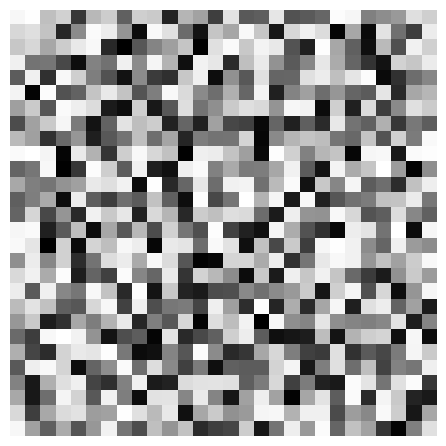

generation: 10, max fitness: 0.9989527931213379
generation: 20, max fitness: 0.999
generation: 30, max fitness: 0.999
generation: 40, max fitness: 0.999
generation: 50, max fitness: 0.999


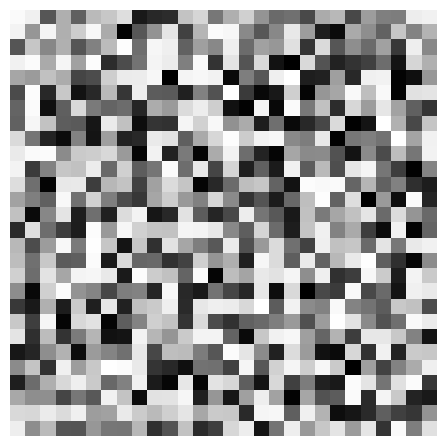

generation: 60, max fitness: 0.999
generation: 70, max fitness: 0.999
generation: 80, max fitness: 0.999
generation: 90, max fitness: 0.999
generation: 100, max fitness: 0.999


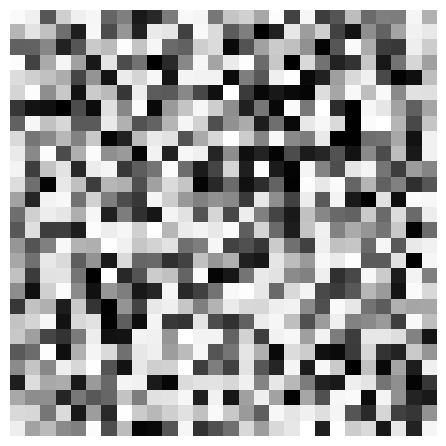

generation: 110, max fitness: 0.999
generation: 120, max fitness: 0.999
generation: 130, max fitness: 0.999
generation: 140, max fitness: 0.999
generation: 150, max fitness: 0.999


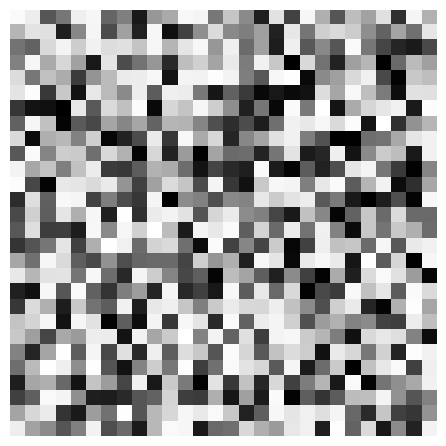

generation: 160, max fitness: 0.999
generation: 170, max fitness: 0.999
generation: 180, max fitness: 0.999
generation: 190, max fitness: 0.999
generation: 200, max fitness: 0.999


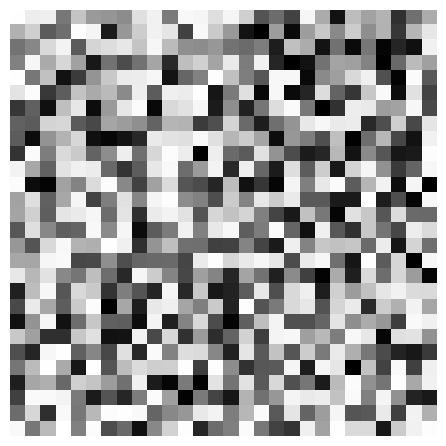

generation: 209, max fitness: 1.0


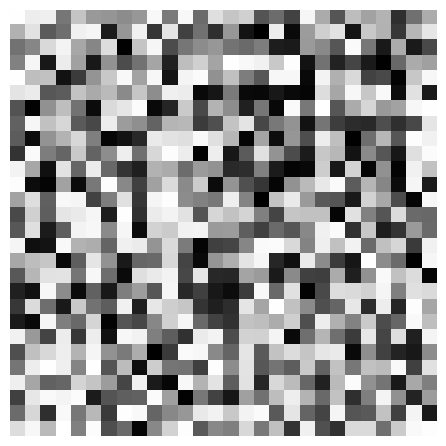

In [ ]:
genLog, fitnessLog, distLog, noiseLog, population, fitnesses = runGA(targetClass = 0, logging=True)

# Plots and Outputs

In [ ]:
distCuttoff = 10 # l3
protosPerClass = 1

def getBestInd(population, fitnesses):
    return population[np.argmax(fitnesses)]

def getAllInds(population, fitnesses):
    bestInds = []
    farPopulation = population.tolist()
    farFitnesses = fitnesses.copy()

    # Loop while theres still some candidates and we still need more protos
    while(len(farPopulation) > 0 and len(bestInds) < protosPerClass):
        # Log best individual
        newBest = np.array(getBestInd(farPopulation, farFitnesses))
        bestInds.append(newBest)

        # remove everyone within the cuttoff (loop backwards)
        for i in range(len(farPopulation)-1, -1, -1):
            if(np.linalg.norm(newBest - population[i]) < distCuttoff):
                farPopulation.pop(i)
                farFitnesses.pop(i)

    return bestInds

1.0
1.0


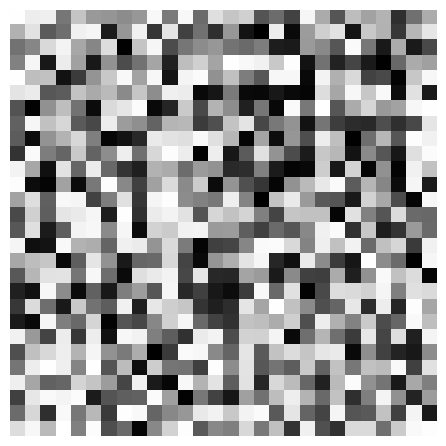

In [ ]:
allInds = getAllInds(population, fitnesses)

print(fitness(0, allInds[0], None))
print(fitnessDenoised(0, allInds[0], None))

for i in range(0, len(allInds)):
    # Show best
    showImage(allInds[i])#, save="drive/MyDrive/ISP_datasets/DF_0.png")

In [ ]:
def saveSingleProto(allInds):
    protoFile = open("drive/MyDrive/ISP_datasets/fashionDFProto.txt", "w")
    protoFile.write(str(list(allInds[0])))
    protoFile.close()

#saveSingleProto(allInds)

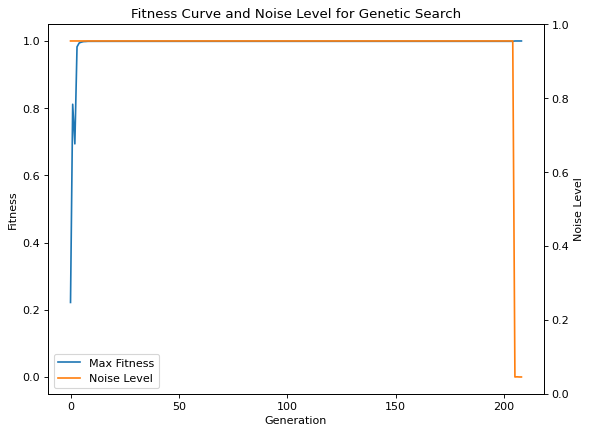

In [ ]:
# Regularise
distLog = distLog / np.max(distLog)
noiseLog = noiseLog / np.max(noiseLog)

# Plot fitness curve
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=80)

ax1.plot(genLog, fitnessLog, label="Max Fitness")
#ax1.plot(genLog, distLog, label="Distance from mean")
plt.plot(genLog, noiseLog, label="Noise Level")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.legend()
ax1.set_title("Fitness Curve and Noise Level for Genetic Search")
#ax1.set_xticks([i for i in range(0, 5)])

ax2 = ax1.twinx()
ax2.set_ylabel("Noise Level")
#plt.savefig("drive/MyDrive/ISP_datasets/DF_Fitness_Curve.png")

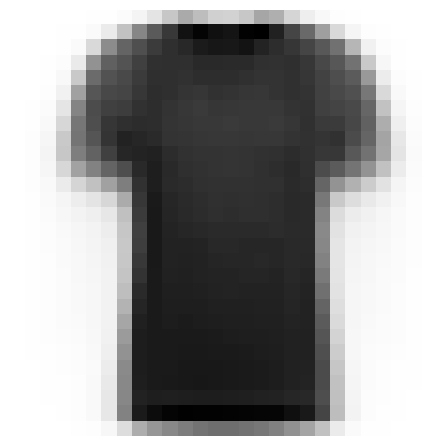

In [ ]:
showImage(ave[0], save="drive/MyDrive/ISP_datasets/fashion_mean_0.png")


# Getting Prototypes from GA

### GA Prototypes

In [ ]:
def getGAPrototypes():
    # Run over unique y values
    prototypes = [None for _ in range(0, numClasses)]
    for c in np.unique(y_tr, axis=0):
        # Extract the class
        targetClass = np.where(c == 1)[0][0]

        # Run GA
        genLog, fitnessLog, distLog, noiseLog, population, fitnesses = runGA(targetClass = targetClass, logging=False)

        # Get and log best individual(s)
        bestInds = getAllInds(population, fitnesses)
        prototypes[targetClass] = bestInds

        print(targetClass)

    return prototypes

### Random Prototypes

In [ ]:
def getRandPrototypes():
    # shuffle data
    indices = np.arange(len(X_tr))
    np.random.shuffle(indices)
    data = X_tr[indices]
    targets = y_tr[indices]

    # Select random examples from each class
    randPrototypes = [[] for _ in range(0, numClasses)]

    # Initialize dictionary storing num occurences of each y which are logged
    usedYCounts = {}
    for i in range(0, len(np.unique(targets, axis=0))):
        usedYCounts[i] = 0

    # Loop through training data
    for i, datapoint in enumerate(data):
        # If we need the current y
        currentY = np.where(targets[i] == 1)[0][0]
        currentYCount = usedYCounts[currentY]
        if(currentYCount < protosPerClass):
            usedYCounts[currentY] += 1

            # log the datapoint
            randPrototypes[currentY].append(datapoint)

    return randPrototypes

### Mean Prototypes

In [ ]:
def getMeanPrototypes():
    meanPrototypes = [[] for _ in range(0, numClasses)]
    for i, average in enumerate(ave):
        for _ in range(0, protosPerClass):
            meanPrototypes[i].append(average)

    return meanPrototypes

## Repeat Prototype Generation

We will repeat all three methods of prototype generation for different random seeds = [0, 1, 2, ...].

The results will be stored in CSV files.

In [ ]:
def protosToFile(file, protos, rep):
    # Loop through each mnist number
    for i, protoList in enumerate(protos):

        # Loop through proto of that number
        for j, proto in enumerate(protoList):
            file.write(str(rep)+"|"+str(i)+"|"+str(proto.tolist())+"\n")

gaFile = open("protos/gaProtos.csv", "w")
gaFile.write("repetition|number|prototype\n")
gaFile.close()
gaFile = open("protos/gaProtos.csv", "a")

randFile = open("protos/randProtos.csv", "w")
randFile.write("repetition|number|proto\n")
randFile.close()
randFile = open("protos/randProtos.csv", "a")

meanFile = open("protos/meanProtos.csv", "w")
meanFile.write("repetition|number|proto\n")
meanFile.close()
meanFile = open("protos/meanProtos.csv", "a")

In [ ]:
repetitions = 2

for i in range(0, repetitions):
    print("REP: "+str(i))

    np.random.seed(i)
    random.seed(i)

    gaProtos = getGAPrototypes()
    protosToFile(gaFile, gaProtos, i)

    randProtos = getRandPrototypes()
    protosToFile(randFile, randProtos, i)

    meanProtos = getMeanPrototypes()
    protosToFile(meanFile, meanProtos, i)

gaFile.close()
randFile.close()
meanFile.close()

REP: 0
9
8
7
6
5
4
3
2
1
0
REP: 1
9
8
7
6
5
4
3
2
1
0


# Results

Read off these prototypes from their file and output some diagrams

In [ ]:
def getProtosFromFile(filename):
    # Extract data from file
    file = open("drive/MyDrive/ISP_datasets/protos/"+filename+".csv", "r")
    fileStr = file.read()
    file.close()
    lines = fileStr.split("\n")
    lines.pop(0)
    lines.pop(len(lines)-1)

    # Find num repetitions
    numReps = int(lines[len(lines) - 1].split("|")[0]) + 1

    # Loop through repetitions
    lineNum = 0
    ans = []
    for i in range(0, numReps):
        # Create empty set (list of 10 empty lists)
        set = [[] for _ in range(0, 10)]

        # Loop through every line in that rep
        while(lineNum < len(lines) and int(lines[lineNum].split("|")[0]) == i):
            l = lines[lineNum].split("|")
            rep = int(l[0])

            # Record proto in set
            number = int(l[1])
            proto = ast.literal_eval(l[2])
            set[number].append(proto)

            # increment
            lineNum += 1

        ans.append(set)
    return ans

def showProtos(protos):
    # Loop through sets
    for rep, set in enumerate(protos):
        # get max rows for figure
        maxRows = max(list(map(lambda l: len(l), set)))

        print("repetition: "+str(rep))
        fig, axs = plt.subplots(maxRows, 10)
        if(maxRows == 1):
            axs = [axs]
        plt.rcParams["figure.figsize"] = [10, maxRows]

        # Go through each 'round' of the set
        for round in range(0, maxRows):

            # Go through each proto
            for i in range(0, numClasses):
                if(round < len(set[i])):
                    proto = set[i][round]
                    axs[round][i].imshow(np.array(proto).reshape((8, 8)), cmap='grey', interpolation='nearest')
                    axs[round][i].axis("off")
                else:
                    axs[round][i].axis("off")

        plt.show()
        #fig.savefig(filename+".png")

### GA Prototypes

repetition: 0


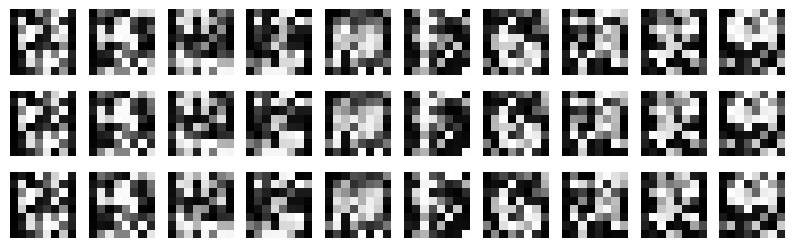

repetition: 1


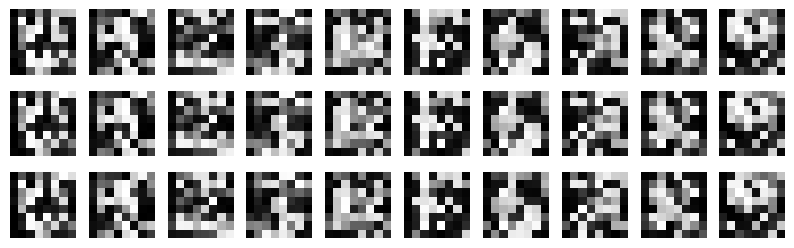

In [ ]:
gaProtos = getProtosFromFile("gaProtos")
showProtos(gaProtos)

### Random Prototypes

repetition: 0


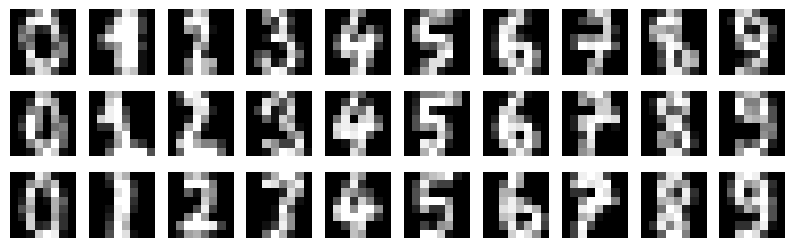

repetition: 1


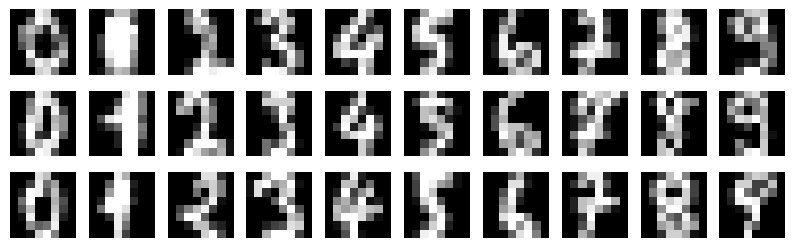

In [ ]:
randProtos = getProtosFromFile("randProtos")
showProtos(randProtos)

### Mean Prototypes

repetition: 0


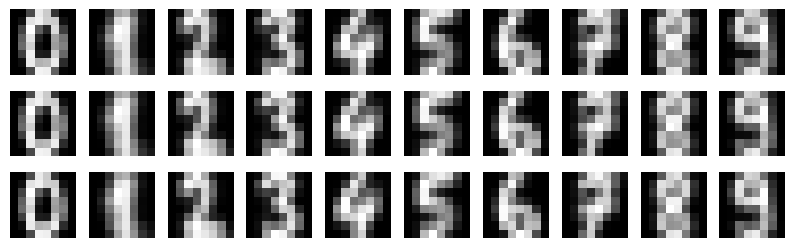

repetition: 1


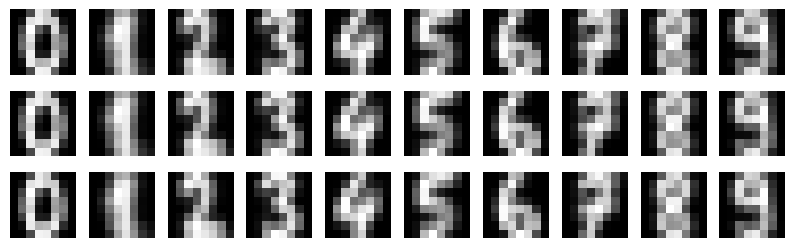

In [ ]:
meanProtos = getProtosFromFile("meanProtos")
showProtos(meanProtos)

# Evaluation

I evaluate these prototypes based on there accuracy classifing the test set using nearest neighbours.

I will compare this accuracy to the accuracy on two control models, one where the prototypes are randomly selected from their class, and one where they are the average.

In [ ]:
if(oneHotEncode):
    # Undo one hot encoding
    y_tr_old = list(map(lambda ohe: np.where(ohe == 1)[0][0], y_tr))
    y_test_old = list(map(lambda ohe: np.where(ohe == 1)[0][0], y_test))

In [ ]:
def evaluateProtos(protos):
    repetitions = 2
    accuracies = np.zeros(repetitions)
    for i in range(0, repetitions):
        # Train and evaluate
        nn = KNeighborsClassifier(n_neighbors=1).fit(protos[i], range(10))
        accuracy = nn.score(X_test, y_test_old)
        accuracies[i] = accuracy

    return accuracies

### GA Prototypes

In [ ]:
gaAccuracies = evaluateProtos(gaProtos)

print("Nearest neighbour on GA prototypes mean accuracy: "+str(np.mean(gaAccuracies)))
print("Nearest neighbour on GA prototypes accuracy variance: "+str(np.var(gaAccuracies)))

Nearest neighbour on GA prototypes mean accuracy: 0.7222222222222222
Nearest neighbour on GA prototypes accuracy variance: 0.00012345679012345593


### Random Prototypes

In [ ]:
randAccuracies = evaluateProtos(randProtos)

print("Nearest neighbour on random prototypes mean accuracy: "+str(np.mean(randAccuracies)))
print("Nearest neighbour on random prototypes accuracy variance: "+str(np.var(randAccuracies)))

Nearest neighbour on random prototypes mean accuracy: 0.6444444444444444
Nearest neighbour on random prototypes accuracy variance: 0.0004938271604938262


### Mean Prototypes

In [ ]:
meanAccuracies = evaluateProtos(meanProtos)

print("Nearest neighbour on mean prototypes mean accuracy: "+str(np.mean(meanAccuracies)))
print("Nearest neighbour on mean prototypes accuracy variance: "+str(np.var(meanAccuracies)))

Nearest neighbour on mean prototypes mean accuracy: 0.7
Nearest neighbour on mean prototypes accuracy variance: 0.0


### Evaluation Plot

Text(0.5, 1.0, 'GA Prototypes Accuracy as Nearest Neighbour Classifier vs Controls')

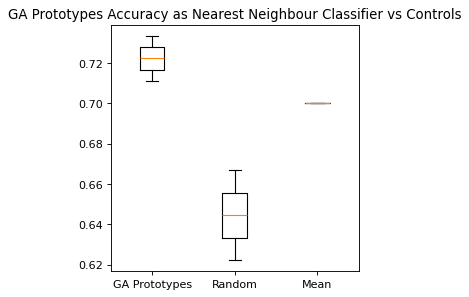

In [ ]:
combinedData = np.concatenate((gaAccuracies.reshape((-1, 1)),
                               randAccuracies.reshape((-1, 1)),
                               meanAccuracies.reshape((-1, 1))), axis=1)

plt.figure(figsize=(4, 4), dpi=80)
plt.boxplot(combinedData, labels=["GA Prototypes", "Random", "Mean"])
plt.title("GA Prototypes Accuracy as Nearest Neighbour Classifier vs Controls")

# Exploration

In [ ]:
# Train and evaluate
nnga = KNeighborsClassifier(n_neighbors=1).fit(gaProtos[0], range(10))
predictions = nnga.predict(X_test)

# Loop through predictions
mistakes = {}
for i, pred in enumerate(predictions):
    # If it's wrong
    if(not pred == y_test_old[i]):
        # Create the mistake index
        if(pred < y_test_old[i]):
            index = str(pred)+str(y_test_old[i])
        else:
            index = str(y_test_old[i])+str(pred)

        # Log the mistake
        if(not index in mistakes):
            mistakes[index] = 1
        else:
            mistakes[index] += 1

# Output results
for key in mistakes.keys():
    print(key[0]+" and "+key[1]+" were mistaken "+str(mistakes[key])+" times.")

6 and 8 were mistaken 6 times.
5 and 7 were mistaken 3 times.
4 and 6 were mistaken 5 times.
5 and 6 were mistaken 1 times.
8 and 9 were mistaken 2 times.
4 and 8 were mistaken 4 times.
2 and 3 were mistaken 2 times.
6 and 9 were mistaken 4 times.
1 and 6 were mistaken 4 times.
1 and 2 were mistaken 2 times.
3 and 6 were mistaken 2 times.
1 and 3 were mistaken 3 times.
2 and 7 were mistaken 1 times.
4 and 7 were mistaken 1 times.
7 and 9 were mistaken 1 times.
5 and 9 were mistaken 1 times.
0 and 2 were mistaken 1 times.
3 and 8 were mistaken 1 times.
1 and 9 were mistaken 2 times.
2 and 6 were mistaken 1 times.
6 and 7 were mistaken 1 times.


### PCA Plot

In [ ]:
# Reduce training data using PCA
pca = PCA(random_state=randomSeed).fit(X_tr)
reducedData = pca.transform(X_tr)

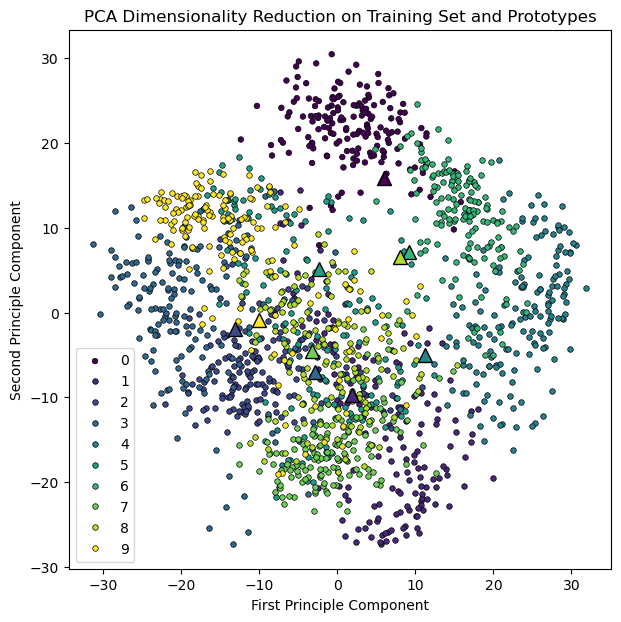

In [ ]:
# Group PCA reduced data into classes (so we can plot each class seperatley for legend)
groupedReducedData = [[] for _ in range(0, numClasses)]
for i, rd in enumerate(reducedData):
    groupedReducedData[y_tr_old[i]].append(rd)

# Plot each class seperatley (for legend)
plt.rcParams["figure.figsize"] = (7, 7)
fig, axs = plt.subplots()
cm = plt.get_cmap("viridis")
for i in range(0, numClasses):
    data = groupedReducedData[i]
    fpc = list(map(lambda x: x[0], data))
    spc = list(map(lambda x: x[1], data))

    if(i == 0):
        axs.scatter(fpc, spc,
                    c=[(i/9) for _ in range(0, len(data))],
                    label=str(i),
                    cmap="viridis",
                    edgecolors="black",
                    s=16, linewidth=0.5)
    else:
        axs.plot(fpc, spc,
                 ".", c=cm(i/9),
                 label=str(i),
                 markersize=8,
                 markeredgecolor="black",
                 markeredgewidth=0.5)

# Reduce prototypes using PCA
reducedProtos = pca.transform(gaProtos[0])
for i in range(0, numClasses):
    axs.plot(reducedProtos[i][0], reducedProtos[i][1], "^", c=cm(i/9), markeredgecolor="black", markersize=10)

plt.legend()
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.title("PCA Dimensionality Reduction on Training Set and Prototypes")
